In the first notebook we did:



*  Data cleaning and formatting
* Exploratory data analysis
* Feature engineering and selection 

In this notebook we will:

* Compare several machine learning models on a performance metric
* Perform hyperparameter tuning on the best model to optimize it for the problem
* Evaluate the best model on the testing set





### Import Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

First we'll read the formatted data from the previous notebook.

In [ ]:
x_train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Energy data/train_features.csv")
y_train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Energy data/train_labels.csv")
x_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Energy data/test_features.csv")
y_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Energy data/test_labels.csv")

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6622, 64)
(6622, 1)
(2839, 64)
(2839, 1)


## Evaluating ML models

We'll compare models using the mean absolute error.

### Impute missing values

Standard ML models can not work with missing values. We already have dropped the columns with more than 50% missing values. But still there are some missing values, now we'll impute them. There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the median of the column.

In [ ]:
x_train.isnull().sum()


Order                                                             0
Property Id                                                       0
DOF Gross Floor Area                                             32
Year Built                                                        0
Number of Buildings - Self-reported                               0
                                                                 ..
Largest Property Use Type_Strip Mall                              0
Largest Property Use Type_Supermarket/Grocery Store               0
Largest Property Use Type_Urgent Care/Clinic/Other Outpatient     0
Largest Property Use Type_Wholesale Club/Supercenter              0
Largest Property Use Type_Worship Facility                        0
Length: 64, dtype: int64

In [ ]:
x_test.isnull().sum()

Order                                                             0
Property Id                                                       0
DOF Gross Floor Area                                             16
Year Built                                                        0
Number of Buildings - Self-reported                               0
                                                                 ..
Largest Property Use Type_Strip Mall                              0
Largest Property Use Type_Supermarket/Grocery Store               0
Largest Property Use Type_Urgent Care/Clinic/Other Outpatient     0
Largest Property Use Type_Wholesale Club/Supercenter              0
Largest Property Use Type_Worship Facility                        0
Length: 64, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(x_train)

x_train=imputer.transform(x_train)
x_test=imputer.transform(x_test)


In [ ]:
# after imputing the dataframes got converted in numpy.ndarray. and so we can't use isnull().sum() here
print(np.isnan(x_train).sum())
print(np.isnan(x_test).sum())

0
0


In [ ]:
# Make sure all values are finite
print(np.where(~np.isfinite(x_train)))
print(np.where(~np.isfinite(x_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


Yes, all the values are finite.

### Scaling Features

We'll scale the features using the technique called normalization.

Normalization:For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.

As with imputation, when we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [ ]:
# Convert y to one-dimensional array (vector)
y = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

### Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [ ]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [ ]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [ ]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [ ]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.5231


In [ ]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0116


In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


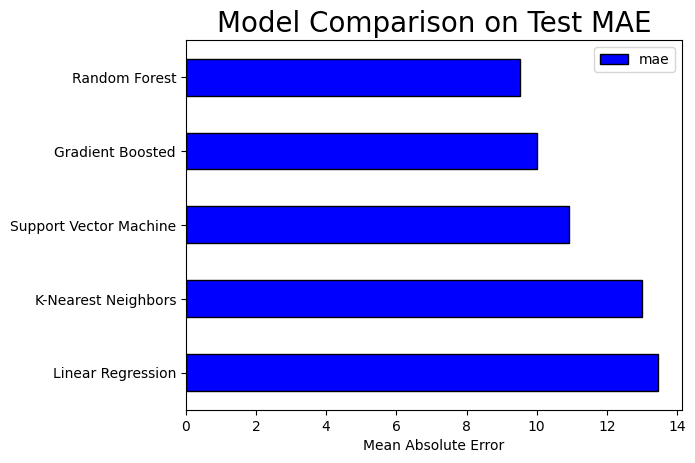

In [ ]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.xlabel('Mean Absolute Error');
plt.title('Model Comparison on Test MAE', size = 20);

Here, Random Forest gave us the least error. So, we'll use this model to predict.

## Model Optimization

### Hyperparameter Tuning with Random Search and Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
model=RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'random_state': [42]
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=25,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    random_state=42,
    error_score='raise'
)

random_search.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_iter=25,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'random_state': [42]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'friedman_mse', 'bootstrap': True}
Best Score: -173.22129528845682


## Evaluate Final Model on the Test Set

We will use the best model from hyperparameter tuning to make predictions on the testing set.

For comparison, we can also look at the performance of the default model. 

In [ ]:
# default model
default_model=RandomForestRegressor(random_state = 42)


#final_model
final_model = RandomForestRegressor(**best_params)

final_model

RandomForestRegressor(criterion='friedman_mse', max_depth=20, max_features=None,
                      min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [ ]:
default_model.fit(X,y)
default_pred = default_model.predict(X_test)

final_model.fit(X,y)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 9.5367.
Final model performance on the test set:   MAE = 9.4794.


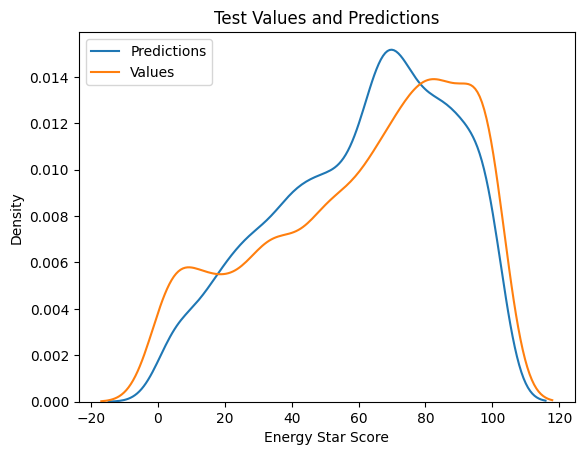

In [135]:
# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

plt.legend()

### Conclusion
In this notebook, we covered crucial concepts in the machine learning pipeline:

1. Imputing missing values
2. Evaluating and comparing several machine learning methods
3. Hyperparameter tuning a machine learning model using random search and cross validation
4. Evaluating the best model on the testing set